<a href="https://colab.research.google.com/github/alpeca/AIML_GreatLearning/blob/main/SupervisedLearning_Project%3AProb-A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## 1. Import and warehouse data:




### Import all the given datasets and explore shape and size of each.

In [3]:
normal_data = pd.read_csv("https://raw.githubusercontent.com/alpeca/AIML_GreatLearning/main/Supervised%20learning/Part1%20-%20Normal.csv")
typeH_data = pd.read_csv("https://raw.githubusercontent.com/alpeca/AIML_GreatLearning/main/Supervised%20learning/Part1%20-%20Type_H.csv")
typeS_data = pd.read_csv("https://raw.githubusercontent.com/alpeca/AIML_GreatLearning/main/Supervised%20learning/Part1%20-%20Type_S.csv")

In [83]:
print("Shape of normal Data Set is : ",normal_data.shape)
print(" ");
normal_data.info()

Shape of normal Data Set is :  (100, 7)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [84]:
print("Shape of TypeH Data Set is : ",typeH_data.shape)
print(" ");
typeH_data.info()

Shape of normal Data Set is :  (60, 7)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


In [85]:
print("Shape of TypeS Data Set is : ",normal_data.shape)
print(" ");
typeS_data.info()

Shape of TypeS Data Set is :  (100, 7)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


### Merge all datasets onto one and explore final shape and size.

In [26]:

data= pd.concat([normal_data,typeS_data,typeH_data],axis=0,ignore_index=True)

In [27]:
print(data.shape)
data.tail()

(310, 7)


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
305,47.657730,13.277385,36.679985,34.380345,98.249781,6.273012,Type_H
306,43.349606,7.467469,28.065483,35.882137,112.776187,5.753277,Type_H
307,46.855781,15.351514,38.000000,31.504267,116.250917,1.662706,Type_H
308,43.203185,19.663146,35.000000,23.540039,124.846109,-2.919076,Type_H
309,48.109236,14.930725,35.564683,33.178512,124.056452,7.947905,Type_H


In [28]:
data.Class.value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

In [30]:
data.Class.replace("Nrmal","Normal",inplace=True);
data.Class.replace("type_h","Type_H",inplace=True);
data.Class.replace("tp_s","Type_S",inplace=True);
data.Class.value_counts()

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

In [33]:
data.isnull().values.any() 

False

In [47]:
data.describe() #Check the ranges and frequency

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [66]:
# data[list(data.columns)[:-1]]
scaled = preprocessing.StandardScaler().fit_transform(data[list(data.columns)[:-1]])

In [75]:
# scaled.transform(data[list(data.columns)[:-1]])
scaled_data= pd.DataFrame(scaled,columns=list(data.columns)[:-1])
scaled_data.describe()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
count,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02,3.100000e+02
mean,-1.085153e-16,2.250888e-16,3.137275e-16,-1.035014e-16,-6.568223e-16,-5.210885e-17
std,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00,1.001617e+00
min,-1.996010e+00,-2.411664e+00,-2.047652e+00,-2.207741e+00,-3.597963e+00,-9.961725e-01
25%,-8.173982e-01,-6.881138e-01,-8.060267e-01,-7.168418e-01,-5.423830e-01,-6.585073e-01
50%,-1.049246e-01,-1.186061e-01,-1.278621e-01,-4.095971e-02,2.613767e-02,-3.874502e-01
75%,7.194643e-01,4.581158e-01,5.975493e-01,7.269414e-01,5.676209e-01,3.997679e-01
max,4.029206e+00,3.191402e+00,3.984615e+00,5.855771e+00,3.395818e+00,1.046035e+01


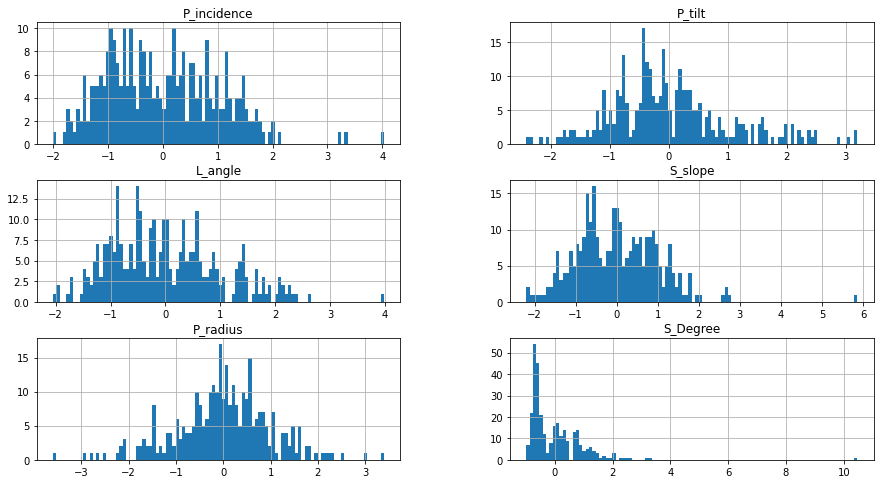

In [76]:
# sns.histplot(x=data.P_incidence,data=data,kde=True)
# columns = list(scaled_data)[0:-1] # Excluding Outcome column which has only 
#data[columns].hist(stacked=False, bins=100, figsize=(15,40), layout=(14,2)); 
scaled_data.hist(stacked=False, bins=100, figsize=(15,40), layout=(14,2));

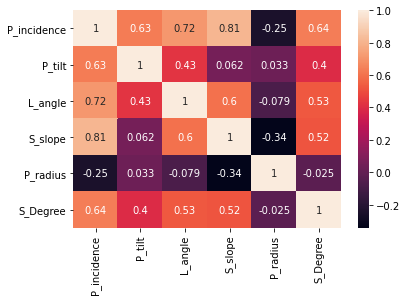

In [78]:
sns.heatmap(scaled_data[:-1].corr(),annot=True);

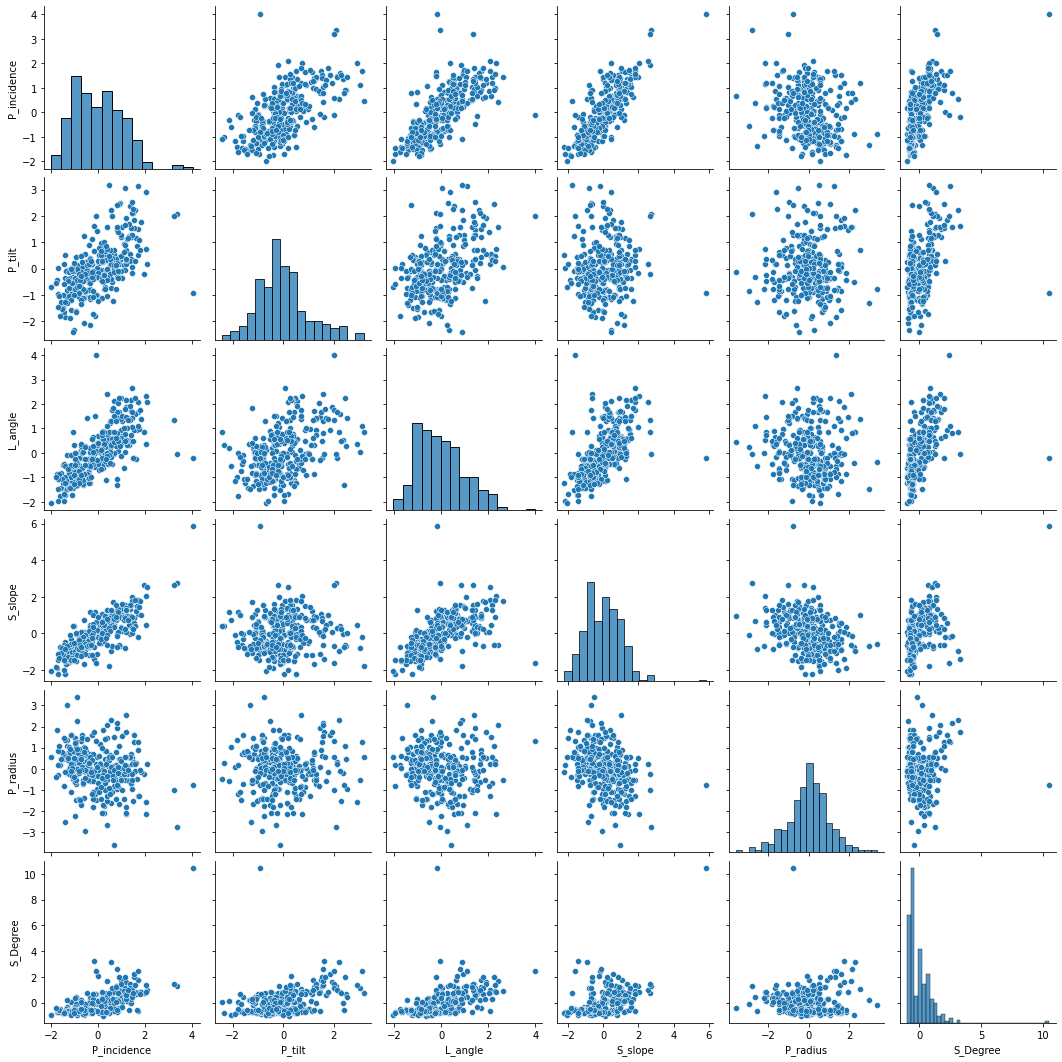

In [80]:
sns.pairplot(scaled_data);

array(['P_incidence', 'P_tilt', 'L_angle', 'S_slope', 'P_radius',
       'S_Degree'], dtype=object)